In [1]:
# import relevant statistical libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# load insurance data and set X and y values
insurance = pd.read_csv('insuranceData.csv')
X = insurance.iloc[:, :-1].values
y = insurance.iloc[:, 4].values

insurance.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


<AxesSubplot:>

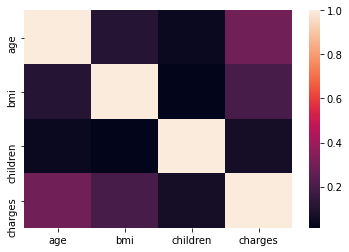

In [4]:
sns.heatmap(insurance.corr())

In [6]:
# apply label encoder and one hot encoder, to change categorical values to binary
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [3])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [8]:
# splitting values into 85% train, 15% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=0)

In [9]:
# performing linear regression on the train values
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# using the regression to predict the test values. 
y_pred = regressor.predict(X_test)

y_pred

array([ 1.14589037e+04,  9.92563631e+03,  3.78118827e+04,  1.58808943e+04,
        6.97360055e+03,  3.68353076e+03,  1.15342243e+03,  1.39982132e+04,
        8.75503190e+03,  7.23945973e+03,  4.22918693e+03,  1.01339013e+04,
        9.07255566e+03,  4.34700013e+03,  2.78291848e+04,  1.11703666e+04,
        1.12276150e+04,  5.55254705e+03,  8.02828014e+03,  2.67296924e+04,
        3.36425305e+04,  1.40398303e+04,  1.12405201e+04,  3.27140150e+04,
        4.50454593e+03,  8.59659654e+03,  8.77241144e+02,  1.01373043e+04,
        4.28492066e+03,  1.01976920e+04,  8.78895560e+03,  4.03641538e+04,
        1.58290309e+04,  1.40146947e+04,  2.45685410e+04,  4.71532278e+03,
        1.28534755e+04,  3.09849097e+04,  3.33370702e+04,  3.84806679e+03,
        3.71745446e+03,  4.46372948e+03,  3.02320057e+04,  3.92297404e+04,
        2.81489195e+04,  4.76793034e+03,  1.10671287e+04,  7.69629560e+03,
        3.27251571e+03,  1.07866355e+04,  5.10182957e+03,  3.20203963e+03,
        3.34514718e+04,  

In [11]:
print(regressor.coef_)

[-11849.85361756  11849.85361756    254.72171877    312.84193584
    429.55191964]


In [12]:
print(regressor.intercept_)

185.84956538537153


In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7904465130093585